# Welcome to Statistics Project-2

Dear Participant,

Please find the below details for Statistics Project-2.

About Data –

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integers and 11 categorical).

dataset - responses.csvView in a new window

For convenience, the original variable names were shortened in the data file.

See the columns.csv file if you want to match the data with the original names.

* The data contain missing values.
* The survey was presented to participants in both electronic and written form.
* The original questionnaire was in Slovak language and was later translated into English.
* All participants were of Slovakian nationality, aged between 15-30.

For this Project we are considering 2 sections of data –  __Health Habits and Spending Habits__

* Health Habits - I live a very healthy lifestyle. 
  - Here Strongly disagree 1-2-3-4-5 Strongly agree
* Spending Habits - I save all the money I can.
  - Strongly disagree 1-2-3-4-5 Strongly agree
 

__The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.__

Steps –

* Load the data and extract the relevant columns. Hint – Relevant Columns will be 
  - Finances
  - Gender
  - Village-Town
  - Healthy Eating
* Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.
* Create Hypothesis on the following questions –
  - Is saving money (finances) gender dependant?
  - Is there any differences in money saving (finances) between people from city or village?
  - Do Women have a Healthier Lifestyle than Men?
  - Are Village People Healthier than City People?
* Perform the required statistical tests to validate/reject the Hypothesis in above step.
* State your insights and conclusions.


Please Note:

__Total marks__ allotted for this assignment is __35__.

In [274]:
# Import necessary Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import scipy
import scipy.stats as stats

In [275]:
# Load the data
survey = pd.read_csv("responses.csv", dtype = { "Gender" : "category", 
                                                "Village - town" : "category"
                                              })

# Check the shape of given dataset
print("Shape of Dataset -- ", survey.shape)

Shape of Dataset --  (1010, 150)


In [276]:
# So we have 1010 rows and 150 columns

# Now let's grab the relevant columns for our analysis

data = survey[["Finances", "Gender", "Village - town", "Healthy eating"]]

data.shape

(1010, 4)

In [277]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding
# ``NaN`` values.
data.describe(include='all')

,Finances,Gender,Village - town,Healthy eating
count,1007.000000,1004,1006,1007.000000
unique,NaN,2,2,NaN
top,NaN,female,city,NaN
freq,NaN,593,707,NaN
mean,3.023833,NaN,NaN,3.031778
std,1.144365,NaN,NaN,0.936865
min,1.000000,NaN,NaN,1.000000
25%,2.000000,NaN,NaN,3.000000
50%,3.000000,NaN,NaN,3.000000
75%,4.000000,NaN,NaN,4.000000


In [278]:
# Count number of missing values
print_missing_cnt = lambda col : print("Missing values in {} column = {}".format(col, sum(data[col].isna().ravel())))

print_missing_cnt("Finances")
print_missing_cnt("Gender")
print_missing_cnt("Village - town")
print_missing_cnt("Healthy eating")

Missing values in Finances column = 3
Missing values in Gender column = 6
Missing values in Village - town column = 4
Missing values in Healthy eating column = 3


In [279]:
print_value_cnt = lambda col : print("\nValue Count for {}: \n{}".format(col, data[col].value_counts(normalize=True)))

print_value_cnt("Finances")
print_value_cnt("Healthy eating")
print_value_cnt("Gender")
print_value_cnt("Village - town")
print("")

print("For 'Finances' column, 35.55% values are set to 3 and for 'Healthy eating' column 50.04% values are set to 3. \
Hence setting the missing values in these columns to 3")
print("")
print("For 'Gender' column, 59.30% values are set to 'female' and for 'Village - town' column 70.39% values are set to 'city'. \
Hence setting the missing values in these columns 'female' & 'city' respectively.")


data = data.fillna(pd.Series(data = [3, "female", "city", 3], index = ["Finances", "Gender", "Village - town", "Healthy eating"]))


Value Count for Finances: 
3.0    0.355511
4.0    0.250248
2.0    0.172790
1.0    0.124131
5.0    0.097319
Name: Finances, dtype: float64

Value Count for Healthy eating: 
3.0    0.500497
4.0    0.237339
2.0    0.136048
1.0    0.080437
5.0    0.045680
Name: Healthy eating, dtype: float64

Value Count for Gender: 
female    0.590637
male      0.409363
Name: Gender, dtype: float64

Value Count for Village - town: 
city       0.702783
village    0.297217
Name: Village - town, dtype: float64

For 'Finances' column, 35.55% values are set to 3 and for 'Healthy eating' column 50.04% values are set to 3. Hence setting the missing values in these columns to 3

For 'Gender' column, 59.30% values are set to 'female' and for 'Village - town' column 70.39% values are set to 'city'. Hence setting the missing values in these columns 'female' & 'city' respectively.


In [280]:
data.describe(include="all")

,Finances,Gender,Village - town,Healthy eating
count,1010.000000,1010,1010,1010.000000
unique,NaN,2,2,NaN
top,NaN,female,city,NaN
freq,NaN,599,711,NaN
mean,3.023762,NaN,NaN,3.031683
std,1.142663,NaN,NaN,0.935473
min,1.000000,NaN,NaN,1.000000
25%,2.000000,NaN,NaN,3.000000
50%,3.000000,NaN,NaN,3.000000
75%,4.000000,NaN,NaN,4.000000


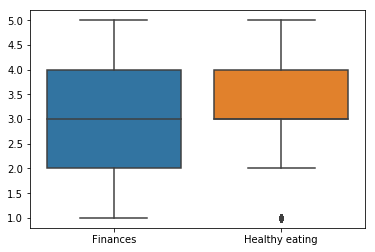

In [281]:
# Now let's form some visualizations on given data

sns.boxplot(data=data)

# Healthy eating- With 25% and 50% values centered around Value-3, Value - 1 in Healthy eating is clearly an outlier. 
# Which means compared to overall population, there are very less people that have less healthy lifestyle.

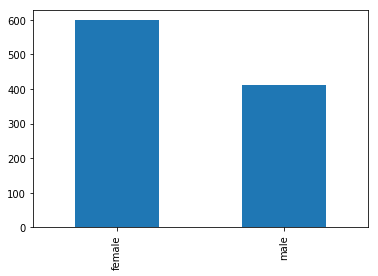

In [282]:
data["Gender"].value_counts().plot(kind="bar")
# More female participated in survey than male

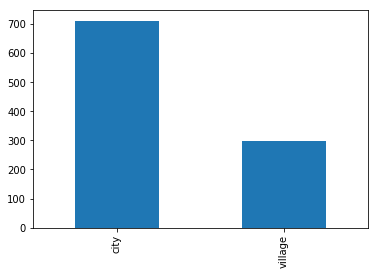

In [283]:
data["Village - town"].value_counts().plot(kind="bar")
# More people from city participated in survey than village

3.0    0.357426
4.0    0.249505
2.0    0.172277
1.0    0.123762
5.0    0.097030
Name: Finances, dtype: float64


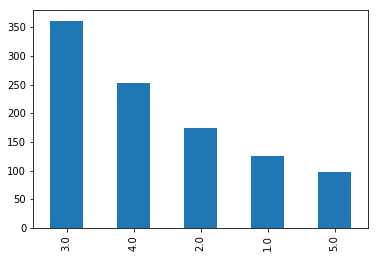

In [284]:
print(data["Finances"].value_counts(normalize=True))
data["Finances"].value_counts().plot(kind="bar")

# There are more people (35%) with rating 3 for Finances which means one third of population would neither try to save all the money that they can
# nor they use all the money that they have.

# Infact the next highest bar is with rating 4 (~25%), which means one fourth of population would 
# save a very decent amount of the money that they can.

3.0    0.501980
4.0    0.236634
2.0    0.135644
1.0    0.080198
5.0    0.045545
Name: Healthy eating, dtype: float64


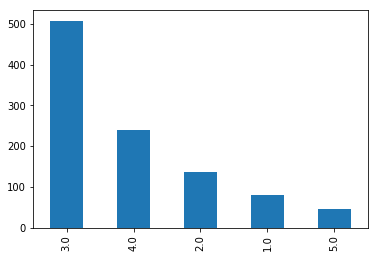

In [285]:
print(data["Healthy eating"].value_counts(normalize=True))
data["Healthy eating"].value_counts().plot(kind="bar")

# Half of the population (50%) neither live very healthy lifestyle nor very unhealthy lifestyle.
# Only 4.5 % of the population would live very healthy lifestyle whereas 8% live very unhealthy lifestyle.

Finances  1.0  2.0  3.0  4.0  5.0
Gender                           
female     65   98  223  150   63
male       60   76  138  102   35


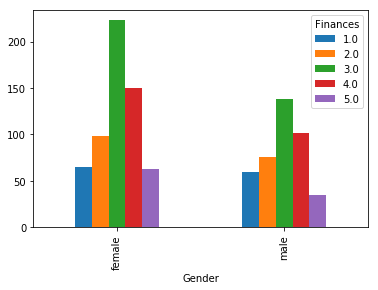

In [286]:
# Some important Cross tabs

# Cross tab to check how male/female handle their finances
print(pd.crosstab(data["Gender"], data["Finances"]))
pd.crosstab(data["Gender"], data["Finances"]).plot(kind="bar")

# Since rating 3, 4, 5 bars are higher for female, it appears that female handle their finances better than male.
# On the other hand there are less number of males that participated in survey than females. So it's obvious that their (male)
# bars are going to be smaller. Hence it's hard to conculde who (male/female) handles their finances better without 
# a statistical test.

Finances        1.0  2.0  3.0  4.0  5.0
Village - town                         
city             88  133  265  168   57
village          37   41   96   84   41


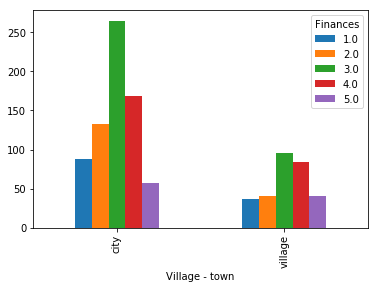

In [287]:
print(pd.crosstab(data["Village - town"], data["Finances"]))
pd.crosstab(data["Village - town"], data["Finances"]).plot(kind="bar")

Healthy eating  1.0  2.0  3.0  4.0  5.0
Gender                                 
female           36   67  329  147   20
male             45   70  178   92   26


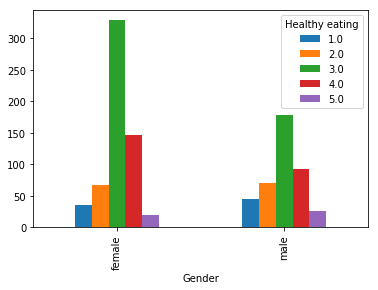

In [288]:
print(pd.crosstab(data["Gender"], data["Healthy eating"]))
pd.crosstab(data["Gender"], data["Healthy eating"]).plot(kind="bar")

Healthy eating  1.0  2.0  3.0  4.0  5.0
Village - town                         
city             58   88  356  177   32
village          23   49  151   62   14


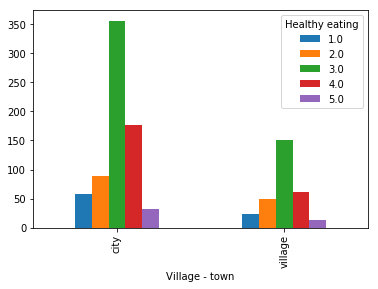

In [289]:
print(pd.crosstab(data["Village - town"], data["Healthy eating"]))
pd.crosstab(data["Village - town"], data["Healthy eating"]).plot(kind="bar")

# Since rating 3, 4, 5 bars are higher for city, it appears that city people live healthier lifestyle than village people

## 2.0 Create Hypothesis on the following questions

### 2.1 - Is saving money (finances) gender dependant?

In [290]:
print("[A] Input")
print("---------")
d1 = pd.crosstab(data["Finances"], data["Gender"])
print(d1)
print("")

# Here we got two Categorical Variables - Gender and Finances
# Thus we can perform Chi-Square Test of Independence to understand if saving money is gender dependent.

print("[B] Hypothesis")
print("--------------")
h0 = "There is no difference in saving money between male and female participants."
h1 = "There is a significant difference in saving money between male and female participants."
print("H0: ", h0)
print("H1: ", h1)
print("")

print("[C] Level of significance")
print("-------------------------")
alpha = 0.05
print("alpha = ", 0.05)
print("")

print("[D] Analysis")
print("------------")
chi2, p_value, dof, expected = stats.chi2_contingency(d1, correction=False)
print("chi2 = ", chi2)
print("p_value = ", p_value)
print("dof = ", dof)
print("expected = \n", expected)
chi2_crit = stats.chi2.isf(q = alpha, df = dof)
print("Critical Value = ", chi2_crit)
print("")

# Should we reject H0?
reject_h0 = chi2 > chi2_crit
print(np.where(reject_h0, 
               "Conclusion : " + h1,
               "Conclusion : " + h0))


[A] Input
---------
Gender    female  male
Finances              
1.0           65    60
2.0           98    76
3.0          223   138
4.0          150   102
5.0           63    35

[B] Hypothesis
--------------
H0:  There is no difference in saving money between male and female participants.
H1:  There is a significant difference in saving money between male and female participants.

[C] Level of significance
-------------------------
alpha =  0.05

[D] Analysis
------------
chi2 =  5.328890527727397
p_value =  0.25518454225298753
dof =  4
expected = 
 [[ 74.13366337  50.86633663]
 [103.19405941  70.80594059]
 [214.0980198  146.9019802 ]
 [149.45346535 102.54653465]
 [ 58.12079208  39.87920792]]
Critical Value =  9.487729036781158

Conclusion : There is no difference in saving money between male and female participants.


### 2.2 - Is there any differences in money saving (finances) between people from city or village?

In [291]:
print("[A] Input")
print("---------")
d1 = pd.crosstab(data["Finances"], data["Village - town"])
print(d1)
print("")

# Here we got two Categorical Variables - Village - town and Finances
# Thus we can perform Chi-Square Test of Independence to understand if saving money is location dependent.

print("[B] Hypothesis")
print("--------------")
h0 = "There is no difference in saving money between people from city and village."
h1 = "There is a significant difference in saving money between people from city and village."
print("H0: ", h0)
print("H1: ", h1)
print("")

print("[C] Level of significance")
print("-------------------------")
alpha = 0.05
print("alpha = ", 0.05)
print("")

print("[D] Analysis")
print("------------")
chi2, p_value, dof, expected = stats.chi2_contingency(d1, correction=False)
print("chi2 = ", chi2)
print("p_value = ", p_value)
print("dof = ", dof)
#print("expected = ", expected)
chi2_crit = stats.chi2.isf(q = alpha, df = dof)
print("Critical Value = ", chi2_crit)
print("")

# Should we reject H0?
reject_h0 = chi2 > chi2_crit
print(np.where(reject_h0, 
               "Conclusion : " + h1,
               "Conclusion : " + h0))

[A] Input
---------
Village - town  city  village
Finances                     
1.0               88       37
2.0              133       41
3.0              265       96
4.0              168       84
5.0               57       41

[B] Hypothesis
--------------
H0:  There is no difference in saving money between people from city and village.
H1:  There is a significant difference in saving money between people from city and village.

[C] Level of significance
-------------------------
alpha =  0.05

[D] Analysis
------------
chi2 =  13.336002693956441
p_value =  0.009745541835991274
dof =  4
Critical Value =  9.487729036781158

Conclusion : There is a significant difference in saving money between people from city and village.


### 2.3 - Do Women have a Healthier Lifestyle than Men?

In [292]:
# Let's first divide the data into two groups according to Gender - Male group and Female group.
# And take Healthy eating for each group
# Then compare means of these two groups
female_grp = data[data["Gender"] == "female"]["Healthy eating"]
male_grp = data[data["Gender"] == "male"]["Healthy eating"]

print("Input (Head)")
print("------------")
print("Healthy Eating - female ")
print(female_grp.head(5))
print("")
print("Healthy Eating - male ")
print(male_grp.head(5))
n1 = len(female_grp)
n2 = len(male_grp)

print("")

print("[B] Hypothesis")
print("--------------")
h0 = "mu_female <= mu_male"
h0_desc = "Women have a less or equal healthy lifestyle as men."
h1 = "mu_female > mu_male"
h1_desc = "Women have healthier lifestyle than men."
print("H0: ", h0)
print("H1: ", h1)
print("")

print("[C] Level of significance")
print("-------------------------")
alpha = 0.05
print("alpha = ", 0.05)
print("")

print("[D] Analysis")
print("------------")
dof = n1 + n2 - 2
print("DOF = ", dof)
t_crit = stats.t.isf(q = 0.05, df = dof)
print("Critical Value = ", t_crit)
t_stat, p_value = stats.ttest_ind(female_grp, male_grp, equal_var=True)
print("t_stat = ", t_stat)
print("p_value = ", p_value)
print("")

# Should we reject H0?
reject_h0 = t_stat > t_crit
print(np.where(reject_h0, 
               "Conclusion : " + h1_desc,
               "Conclusion : " + h0_desc))

Input (Head)
------------
Healthy Eating - female 
0    4.0
1    3.0
2    3.0
3    3.0
4    4.0
Name: Healthy eating, dtype: float64

Healthy Eating - male 
5     2.0
7     2.0
15    5.0
18    4.0
19    3.0
Name: Healthy eating, dtype: float64

[B] Hypothesis
--------------
H0:  mu_female <= mu_male
H1:  mu_female > mu_male

[C] Level of significance
-------------------------
alpha =  0.05

[D] Analysis
------------
DOF =  1008
Critical Value =  1.64636670140285
t_stat =  1.990009744180731
p_value =  0.04685965412880698

Conclusion : Women have healthier lifestyle than men.


### 2.4 - Are Village People Healthier than City People?

In [293]:
# Let's first divide the data into two groups according to Village - town - city group and village group.
# And take Healthy eating for each group
# Then compare means of these two groups
city_grp = data[data["Village - town"] == "city"]["Healthy eating"]
village_grp = data[data["Village - town"] == "village"]["Healthy eating"]

print("Input (Head)")
print("------------")
print("Healthy Eating - city ")
print(city_grp.head(5))
print("")
print("Healthy Eating - village ")
print(village_grp.head(5))
n1 = len(city_grp)
n2 = len(village_grp)

print("")

print("[B] Hypothesis")
print("--------------")
h0 = "mu_village <= mu_city"
h0_desc = "Village people have a less or equal healthy lifestyle as City people."
h1 = "mu_village > mu_city"
h1_desc = "Village people have healthier lifestyle than City people."
print("H0: ", h0)
print("H1: ", h1)
print("")

print("[C] Level of significance")
print("-------------------------")
alpha = 0.05
print("alpha = ", 0.05)
print("")

print("[D] Analysis")
print("------------")
dof = n1 + n2 - 2
print("DOF = ", dof)
t_crit = stats.t.isf(q = 0.05, df = dof)
print("Critical Value = ", t_crit)
t_stat, p_value = stats.ttest_ind(village_grp, city_grp, equal_var=True)
print("t_stat = ", t_stat)
print("p_value = ", p_value)
print("")

# Should we reject H0?
reject_h0 = t_stat > t_crit
print(np.where(reject_h0, 
               "Conclusion : " + h1_desc,
               "Conclusion : " + h0_desc))
print("")

Input (Head)
------------
Healthy Eating - city 
1    3.0
2    3.0
3    3.0
5    2.0
7    2.0
Name: Healthy eating, dtype: float64

Healthy Eating - village 
0     4.0
4     4.0
6     4.0
17    3.0
28    5.0
Name: Healthy eating, dtype: float64

[B] Hypothesis
--------------
H0:  mu_village <= mu_city
H1:  mu_village > mu_city

[C] Level of significance
-------------------------
alpha =  0.05

[D] Analysis
------------
DOF =  1008
Critical Value =  1.64636670140285
t_stat =  -1.066485812628908
p_value =  0.2864594559841501

Conclusion : Village people have a less or equal healthy lifestyle as City people.



In [294]:
print("Overall conculsion: ")
pd.options.display.max_colwidth = 100
pd.DataFrame({"Gender" : ["There is no difference in saving money between male and female.", "Women have healthier lifestyle than men."],
              "Location" : ["There is significant difference in saving money between people from city and village.", "Village people are less or equally healthy as city people."]
             }, index = ["Saving Money", "Healthier Lifestyle"])

Overall conculsion: 


,Gender,Location
Saving Money,There is no difference in saving money between male and female.,There is significant difference in saving money between people from city and village.
Healthier Lifestyle,Women have healthier lifestyle than men.,Village people are less or equally healthy as city people.
